# Data Analysis on Covid-19 Dataset

### Libraries used 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing Datasets (Data Understanding)


The owid-covid-data.csv consists the testing information
The full-data consists the data for each country based on each day, the new cases and new deaths

In [5]:
df1=pd.read_csv("owid-covid-data.csv")
df2=pd.read_csv("full_data.csv")

In [16]:
df1.shape[0] # Number of row

20338

In [15]:
df1.shape[1] # No of Columns

32

In [17]:
df2.shape[0] # No of rows

19605

In [18]:
df2.shape[1] # No of Columns

6

### Checking if there are any NaNs (Data Preparation) 

The reason for checking nulls and remove data, was to reduce the execution time. The full_data (df2) doesnt consist of any nulls. The owid_covid_data(df1) consists of nulls. It doesnt affect the analysis.

In [19]:
no_nulls=df1.columns[df1.isnull().mean()==0]

In [20]:
no_nulls

Index(['location', 'date', 'total_cases', 'new_cases', 'total_deaths',
       'new_deaths'],
      dtype='object')

In [21]:
no_nulls1=df2.columns[df2.isnull().mean()==0]

In [22]:
no_nulls1

Index(['date', 'location', 'new_cases', 'new_deaths', 'total_cases',
       'total_deaths'],
      dtype='object')

In [23]:
most_missing_columns=df1.columns[df1.isnull().mean() > 0.75]

In [24]:
most_missing_columns

Index(['new_tests', 'new_tests_per_thousand'], dtype='object')

In [29]:
most_missing_columns1=df2.columns[df2.isnull().mean() > 0.95]

In [30]:
most_missing_columns1

Index([], dtype='object')

### The dataset owid-covid-data overview

In [31]:
df1.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN


### The full_data dataset overview

In [35]:
df2.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2019-12-31,Afghanistan,0,0,0,0
1,2020-01-01,Afghanistan,0,0,0,0
2,2020-01-02,Afghanistan,0,0,0,0
3,2020-01-03,Afghanistan,0,0,0,0
4,2020-01-04,Afghanistan,0,0,0,0


### Data Understanding

In [10]:
def des(df): 
    "argument df the dataframe"
    return df.describe()     ### Functions to use describe 

In [11]:
des(df1)

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
count,2.033800e+04,20338.000000,20338.000000,20338.000000,19961.000000,19961.000000,19961.000000,19961.000000,5.437000e+03,4838.000000,...,18250.000000,18406.000000,18244.000000,12103.000000,18425.000000,19096.000000,15010.000000,14848.000000,8042.000000,16998.000000
mean,1.898127e+04,556.260694,1253.405300,34.944931,530.853197,13.446024,23.231848,0.573905,2.685801e+05,10548.904299,...,9.878091,6.291109,23186.992686,10.161150,245.211243,8.008498,11.318474,32.638682,55.324711,3.229277
std,1.947971e+05,4956.920401,13172.080459,332.799785,1520.191732,63.410932,95.071651,3.546022,9.700661e+05,35121.190338,...,6.470413,4.444620,21362.802225,17.571374,119.030719,4.028059,10.571002,13.206363,30.937981,2.610269
min,0.000000e+00,-2461.000000,0.000000,-1918.000000,0.000000,-265.189000,0.000000,-41.023000,1.000000e+00,1.000000,...,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000
25%,6.000000e+00,0.000000,0.000000,0.000000,0.759000,0.000000,0.000000,0.000000,9.014000e+03,569.000000,...,4.029000,2.361000,6570.102000,0.500000,151.089000,5.310000,1.900000,21.400000,24.640000,1.400000
50%,9.600000e+01,2.000000,1.000000,0.000000,32.270000,0.272000,0.219000,0.000000,4.689800e+04,1974.000000,...,7.775000,4.832000,15807.374000,1.500000,233.070000,7.110000,7.000000,31.400000,59.607000,2.600000
75%,1.295000e+03,46.000000,28.000000,1.000000,268.608000,5.995000,5.041000,0.060000,1.689580e+05,6488.750000,...,15.322000,9.842000,35938.374000,10.000000,311.110000,10.080000,19.800000,40.800000,84.169000,4.280000
max,5.656615e+06,107924.000000,355355.000000,10520.000000,19653.486000,4944.376000,1237.551000,200.040000,1.490704e+07,441248.000000,...,27.049000,18.493000,116935.600000,77.600000,724.417000,23.360000,44.000000,78.100000,98.999000,13.800000


In [12]:
des(df2)

,new_cases,new_deaths,total_cases,total_deaths
count,19605.000000,19605.000000,1.960500e+04,19605.000000
mean,556.952410,35.296506,1.854721e+04,1228.276103
std,4941.304251,335.221876,1.892796e+05,12878.828962
min,-2461.000000,-1918.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,7.000000e+00,0.000000
50%,2.000000,0.000000,9.700000e+01,2.000000
75%,47.000000,1.000000,1.279000e+03,27.000000
max,107909.000000,10520.000000,5.459526e+06,345994.000000


In [13]:
# Function to see the correlation of each features

def cor(df):
    "argument df tp get the correlation for"
    return df.corr()

In [14]:
cor(df1)

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
total_cases,1.000000,0.907891,0.990071,0.802518,0.059886,0.026631,0.086967,0.042990,0.900831,0.875836,...,0.029655,0.028553,0.017181,-0.025794,-0.035041,0.012630,0.005495,-0.002416,0.014899,-0.004377
new_cases,0.907891,1.000000,0.884915,0.935325,0.038288,0.043515,0.047792,0.053978,0.715981,0.818408,...,0.022803,0.020976,0.014910,-0.027871,-0.033397,0.017437,-0.000002,-0.004346,0.017917,-0.009698
total_deaths,0.990071,0.884915,1.000000,0.796852,0.069119,0.022213,0.134813,0.057477,0.809941,0.773347,...,0.043754,0.043959,0.018162,-0.026170,-0.047207,-0.000425,0.016923,-0.009166,0.014510,-0.006990
new_deaths,0.802518,0.935325,0.796852,1.000000,0.043417,0.037752,0.081901,0.101462,0.570155,0.647565,...,0.040870,0.040345,0.018086,-0.028501,-0.049541,0.003435,0.013736,-0.014559,0.017663,-0.011019
total_cases_per_million,0.059886,0.038288,0.069119,0.043417,1.000000,0.371845,0.703538,0.233180,0.285433,0.241015,...,0.213160,0.215781,0.348570,-0.177587,-0.228634,-0.013236,0.214052,-0.063526,0.215159,0.070612
new_cases_per_million,0.026631,0.043515,0.022213,0.037752,0.371845,1.000000,0.199895,0.175899,0.140288,0.167085,...,0.075989,0.077692,0.304324,-0.132436,-0.155785,0.040852,0.094104,-0.040141,0.107547,0.026380
total_deaths_per_million,0.086967,0.047792,0.134813,0.081901,0.703538,0.199895,1.000000,0.346358,0.322256,0.281547,...,0.273726,0.284080,0.209183,-0.123791,-0.214402,-0.085739,0.254691,-0.060901,0.166296,0.058949
new_deaths_per_million,0.042990,0.053978,0.057477,0.101462,0.233180,0.175899,0.346358,1.000000,0.179409,0.215501,...,0.234840,0.242580,0.139454,-0.116154,-0.181102,-0.060735,0.211083,-0.063027,0.101547,0.039778
total_tests,0.900831,0.715981,0.809941,0.570155,0.285433,0.140288,0.322256,0.179409,1.000000,0.950907,...,0.094305,0.092552,0.135653,-0.085042,0.007498,0.083868,0.092635,0.018338,0.022623,0.047188
new_tests,0.875836,0.818408,0.773347,0.647565,0.241015,0.167085,0.281547,0.215501,0.950907,1.000000,...,0.092990,0.089019,0.136744,-0.080390,0.038123,0.095544,0.089980,0.026733,0.012706,0.050843


In [15]:
cor(df2)

,new_cases,new_deaths,total_cases,total_deaths
new_cases,1.000000,0.935333,0.907610,0.882475
new_deaths,0.935333,1.000000,0.804662,0.796867
total_cases,0.907610,0.804662,1.000000,0.990029
total_deaths,0.882475,0.796867,0.990029,1.000000


### Modeling

### Grouby to see top 10 countries for conducting most no of tests

In [265]:
cols4=df1.groupby(["location","population"])[["new_tests"]].sum()

In [266]:
cols4.nlargest(11,'new_tests')

,,new_tests
location,population,
United States,331002647.00,14903204.00
Russia,145934460.00,9281302.00
Italy,60461828.00,3602927.00
India,1380004385.00,2991231.00
United Kingdom,67886004.00,1969743.00
Turkey,84339067.00,1753173.00
Canada,37742157.00,1397201.00
Australia,25499881.00,1041167.00
South Korea,51269183.00,826486.00


### Analyzing New Zealand's testing number

In [242]:
dfnz=df1[df1["location"]=='New Zealand']

In [243]:
dfnz

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
14483,NZL,New Zealand,2019-12-31,0,0,0,0,0.00,0.00,0.00,...,15.32,9.72,36085.84,nan,128.80,8.08,14.80,17.20,nan,2.61
14484,NZL,New Zealand,2020-01-01,0,0,0,0,0.00,0.00,0.00,...,15.32,9.72,36085.84,nan,128.80,8.08,14.80,17.20,nan,2.61
14485,NZL,New Zealand,2020-01-02,0,0,0,0,0.00,0.00,0.00,...,15.32,9.72,36085.84,nan,128.80,8.08,14.80,17.20,nan,2.61
14486,NZL,New Zealand,2020-01-03,0,0,0,0,0.00,0.00,0.00,...,15.32,9.72,36085.84,nan,128.80,8.08,14.80,17.20,nan,2.61
14487,NZL,New Zealand,2020-01-04,0,0,0,0,0.00,0.00,0.00,...,15.32,9.72,36085.84,nan,128.80,8.08,14.80,17.20,nan,2.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14626,NZL,New Zealand,2020-05-24,1154,0,21,0,239.31,0.00,4.36,...,15.32,9.72,36085.84,nan,128.80,8.08,14.80,17.20,nan,2.61
14627,NZL,New Zealand,2020-05-25,1154,0,21,0,239.31,0.00,4.36,...,15.32,9.72,36085.84,nan,128.80,8.08,14.80,17.20,nan,2.61
14628,NZL,New Zealand,2020-05-26,1154,0,21,0,239.31,0.00,4.36,...,15.32,9.72,36085.84,nan,128.80,8.08,14.80,17.20,nan,2.61
14629,NZL,New Zealand,2020-05-27,1154,0,21,0,239.31,0.00,4.36,...,15.32,9.72,36085.84,nan,128.80,8.08,14.80,17.20,nan,2.61


In [259]:
dfnz['total_tests']

14483         nan
14484         nan
14485         nan
14486         nan
14487         nan
           ...   
14626   261315.00
14627   263156.00
14628   267435.00
14629         nan
14630         nan
Name: total_tests, Length: 148, dtype: float64

In [274]:
cols00=dfnz.groupby(["location","new_cases"])[["new_tests"]].sum()

In [275]:
cols00

new_tests
location    new_cases           
New Zealand 0           65642.00
            1           43158.00
            2           43565.00
            3           19878.00
            4           10922.00
            5            6480.00
            6            7902.00
            7            3203.00
            8            7537.00
            11           1554.00
            12           1209.00
            13           1256.00
            14           2836.00
            15           1572.00
            20           2421.00
            23           7581.00
            26           3990.00
            32           4049.00
            36           1050.00
            39           2908.00
            40           1544.00
            47           2592.00
            48           3709.00
            49           3631.00
            52           3093.00
            60            918.00
            73           2117.00
            76           6904.00
            78           1809.00
            95           2093.00

The below clearly shows the no of tests happening evey though the active cases were less.

In [276]:
cols00.nlargest(10,'new_tests') # New Zealand's Success Story

new_tests
location    new_cases           
New Zealand 0           65642.00
            2           43565.00
            1           43158.00
            3           19878.00
            4           10922.00
            6            7902.00
            23           7581.00
            8            7537.00
            76           6904.00
            5            6480.00

<b> The World was also present in the dataset which was capturing all the top 10 positions when sorting the groupby results </b>


In [199]:
dfnew=df1[df1["location"]!='World']

#### No of deaths in countries by date ( Top 10 countries )

In [200]:
cols01=dfnew.groupby(["location","date"])[["new_deaths"]].sum()

In [201]:
cols01

new_deaths
location    date                  
Afghanistan 2019-12-31           0
            2020-01-01           0
            2020-01-02           0
            2020-01-03           0
            2020-01-04           0
...                            ...
Zimbabwe    2020-05-24           0
            2020-05-25           0
            2020-05-26           0
            2020-05-27           0
            2020-05-28           0

[20188 rows x 1 columns]

In [205]:
cols01.nlargest(10,'new_deaths') # USA dominates when analysed based on dates

new_deaths
location      date                  
United States 2020-04-16        4928
              2020-04-18        3770
              2020-04-24        3179
              2020-04-30        2611
              2020-04-22        2524
              2020-04-15        2408
              2020-05-07        2353
              2020-04-17        2299
              2020-05-08        2239
              2020-04-26        2172

### Top 10 countries with highest no of tests

In [267]:
cols2=df1.groupby(["location"])[["new_tests"]].sum()

In [268]:
cols2

,new_tests
location,
Afghanistan,0.00
Albania,0.00
Algeria,0.00
Andorra,0.00
Angola,0.00
...,...
Western Sahara,0.00
World,0.00
Yemen,0.00


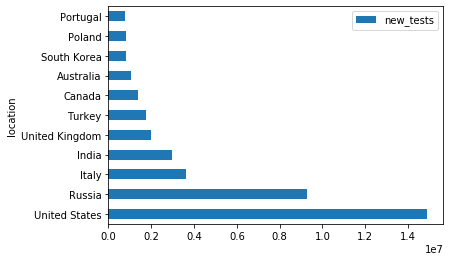

In [270]:
cols2.nlargest(11,'new_tests').plot.barh() # Top 10 countries with highest tests 

In [122]:
cols1=df1.groupby("location")[["new_deaths"]].sum()

In [123]:
cols1

,new_deaths
location,
Afghanistan,227
Albania,33
Algeria,623
Andorra,51
Angola,4
...,...
Western Sahara,0
World,355355
Yemen,53


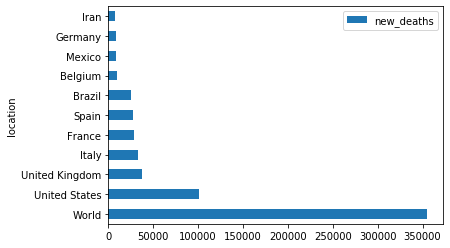

In [196]:
cols1.nlargest(11,'new_deaths').plot.barh()  # Top 10 Countries with highest no of  Deaths 

In [217]:
co=cols1[cols1['new_deaths']!=0]

In [228]:
co1=cols1[cols1['new_deaths']<500]

#### Top 10 countries with highest new cases

In [18]:
pd.options.display.float_format = '{:.2f}'.format
cols=df2.groupby("location")[["new_cases"]].sum()

In [19]:
cols

,new_cases
location,
Afghanistan,11173
Albania,1004
Algeria,8503
Andorra,763
Angola,69
...,...
Western Sahara,6
World,5459526
Yemen,237


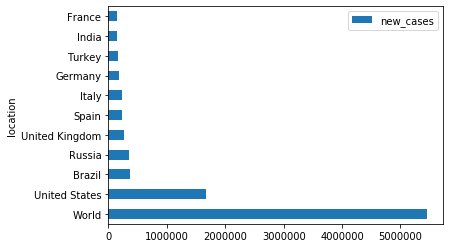

In [20]:
cols.nlargest(11,'new_cases').plot.barh() # Top 10 Countries with highest no of Cases